<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/mobile_price_prediction_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from google.colab import drive
import missingno as msno
from google.colab import files 
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd 
import io 

df = pd.read_csv('train.csv') 
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


check distribution of target column

In [ ]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [ ]:
df['price_range'].value_counts()/np.float(len(df))

3    0.25
2    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

In [ ]:
def newLine():
  print(" ")  
  print("_____________________")  
  print(" ") 

In [ ]:
print(df.isnull().sum().max())
newLine()
print(df.info())

0
 
_____________________
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-

In [ ]:
df=df.rename(index=str, columns={"battery_power": "Battery Power",
                                 "blue": "Bluetooth",
                                 "clock_speed":"Clock Speed",
                                 "dual_sim":"Dual Sim",
                                 "fc":"Front Camera MP",
                                 "four_g":"4G",
                                 "int_memory":"Internal Memory(GB)",
                                 "m_dep":"Mobile Depth(CM)",
                                 "mobile_wt":"Weight",
                                 "n_cores":"Number of cores",
                                 "pc":"Primary Camera MP",
                                 "px_height":"Pixel R. Height",
                                 "px_width":"Pixel R. Width",
                                 "ram":"RAM(MB)",
                                 "sc_h":"Screen Height(cm)",
                                 "sc_w":"Screen Width",
                                 "talk_time":"Longest Battery Charge",
                                 "three_g":"3G",
                                 "touch_screen":"Touch Screen",
                                 "wifi":"WIFI"})

In [ ]:
df.isnull().any()

Battery Power             False
Bluetooth                 False
Clock Speed               False
Dual Sim                  False
Front Camera MP           False
4G                        False
Internal Memory(GB)       False
Mobile Depth(CM)          False
Weight                    False
Number of cores           False
Primary Camera MP         False
Pixel R. Height           False
Pixel R. Width            False
RAM(MB)                   False
Screen Height(cm)         False
Screen Width              False
Longest Battery Charge    False
3G                        False
Touch Screen              False
WIFI                      False
price_range               False
dtype: bool

check for missing value with ***missingno*** lib

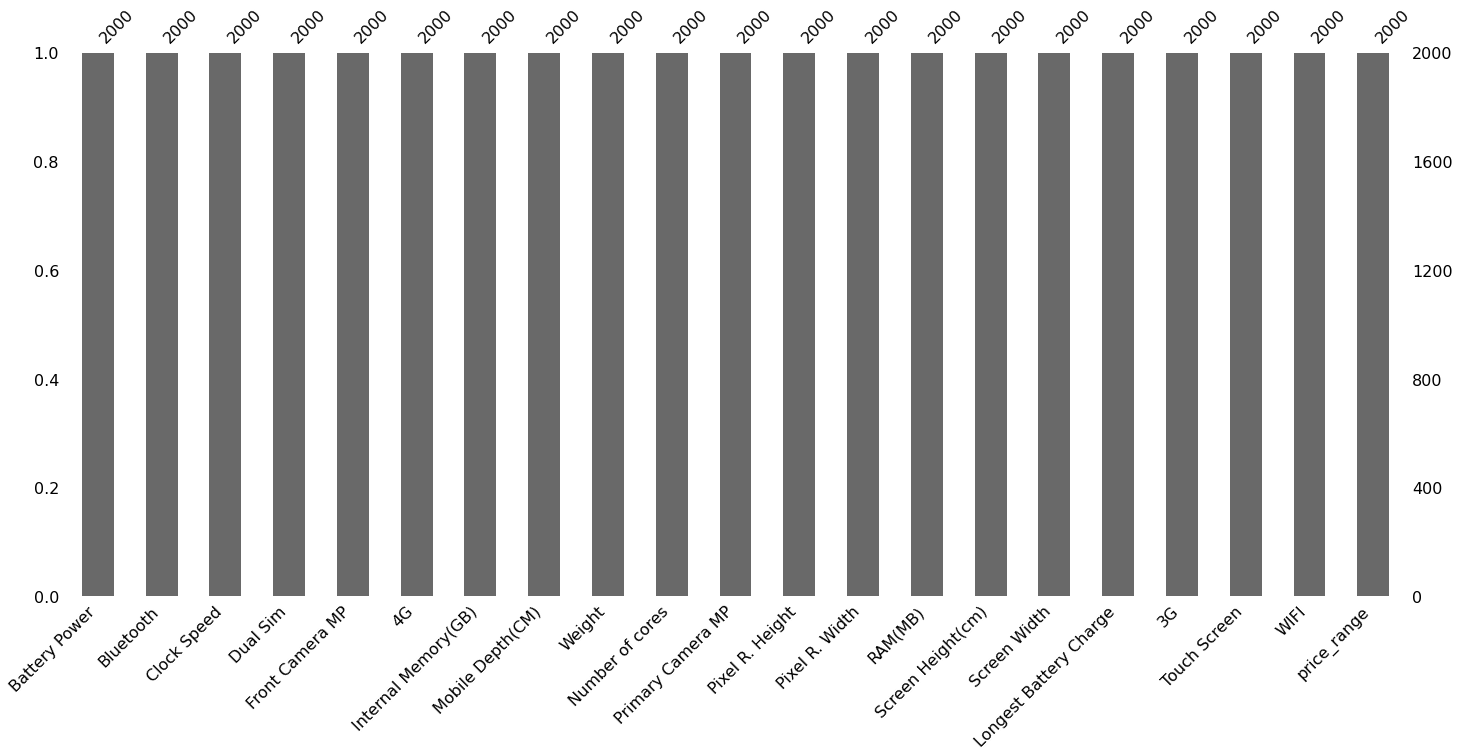

In [ ]:
msno.bar(df)
plt.show()

find correlation between features

Text(0.5, 1.0, 'Correlation')

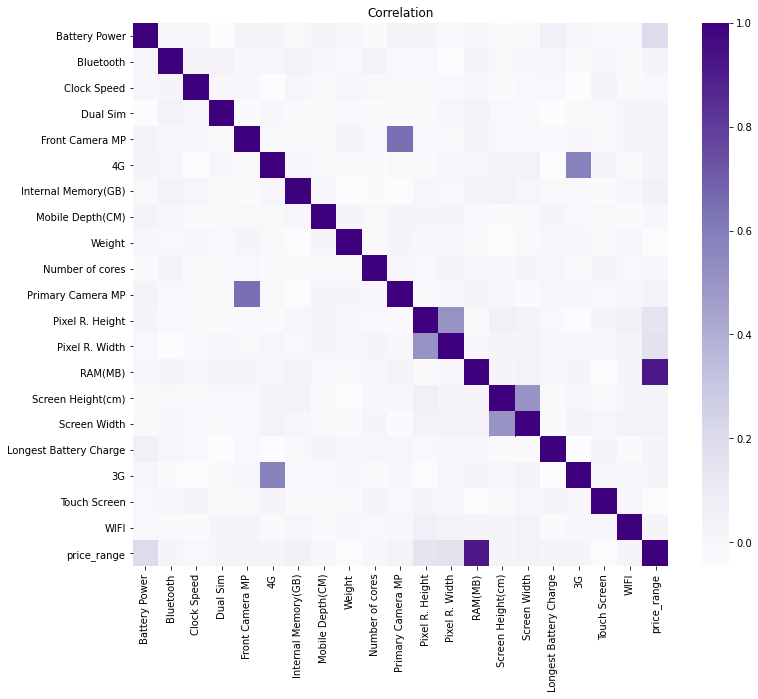

In [ ]:
corrMatrix= df.corr()
f,ax = plt.subplots(figsize=(12,10))
r=sns.heatmap(corrMatrix ,cmap='Purples', annot_kws={'size':8})
r.set_title('Correlation')

sort feature with the most relation with price

In [ ]:
corrMatrix.sort_values(by=['price_range'],ascending=False).iloc[0].sort_values(ascending=False)

price_range               1.000000
RAM(MB)                   0.917046
Battery Power             0.200723
Pixel R. Width            0.165818
Pixel R. Height           0.148858
Internal Memory(GB)       0.044435
Screen Width              0.038711
Primary Camera MP         0.033599
3G                        0.023611
Screen Height(cm)         0.022986
Front Camera MP           0.021998
Longest Battery Charge    0.021859
Bluetooth                 0.020573
WIFI                      0.018785
Dual Sim                  0.017444
4G                        0.014772
Number of cores           0.004399
Mobile Depth(CM)          0.000853
Clock Speed              -0.006606
Weight                   -0.030302
Touch Screen             -0.030411
Name: price_range, dtype: float64

there is no need to handle dummy variable or missing values

splite sample data to train and test 

In [ ]:
y = df['price_range'].values
x_data = df.drop(["price_range"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(np.min(x_data)))
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


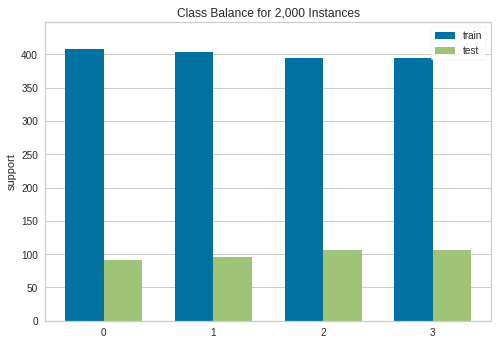

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

first SVM model

In [ ]:
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

print("train accuracy: ",svm.score(x_train,y_train))
print("test accuracy: ",svm.score(x_test,y_test))

train accuracy:  0.965
test accuracy:  0.825


f_classif to find the best features

1.   List item
2.   List item




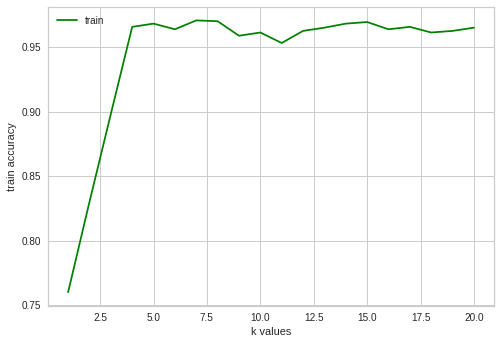

max accuracy: 0.970625
max accuracy id: 6


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

better accuracy

find the 6 best features

In [ ]:
selector = SelectKBest(f_classif, k = 6)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['Battery Power' 'Internal Memory(GB)' 'Weight' 'Pixel R. Height'
 'Pixel R. Width' 'RAM(MB)']
x test features: ['Battery Power' 'Internal Memory(GB)' 'Weight' 'Pixel R. Height'
 'Pixel R. Width' 'RAM(MB)']


linear kernel and diffrent C

In [ ]:
svm_model=SVC(C=1,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.96375
test_accuracy:  0.31


In [ ]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.965
test_accuracy:  0.3125


In [ ]:
svm_model=SVC(C=100,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.975625
test_accuracy:  0.3075


In [ ]:
svm_model=SVC(C=1000,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.979375
test_accuracy:  0.305


RBF kernel and diffrent C

In [ ]:
svm_model=SVC(C=1,decision_function_shape="ovo",gamma="auto",kernel="rbf",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.95875
test_accuracy:  0.31


In [ ]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="rbf",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.960625
test_accuracy:  0.315


In [ ]:
svm_model=SVC(C=100,decision_function_shape="ovo",gamma="auto",kernel="rbf",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.97875
test_accuracy:  0.3025


In [ ]:
svm_model=SVC(C=1000,decision_function_shape="ovo",gamma="auto",kernel="rbf",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.9875
test_accuracy:  0.305


polynomial kernel and diffrent C

In [ ]:
svm_model=SVC(C=1,decision_function_shape="ovo",gamma="auto",kernel="poly",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.4325
test_accuracy:  0.3075


In [ ]:
svm_model=SVC(C=100,decision_function_shape="ovo",gamma="auto",kernel="poly",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.94
test_accuracy:  0.32


In [ ]:
svm_model=SVC(C=1000,decision_function_shape="ovo",gamma="auto",kernel="poly",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.965
test_accuracy:  0.3075


sigmoid kernel and diffrent C

In [ ]:
svm_model=SVC(C=1,decision_function_shape="ovo",gamma="auto",kernel="sigmoid",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.950625
test_accuracy:  0.3125


In [ ]:
svm_model=SVC(C=100,decision_function_shape="ovo",gamma="auto",kernel="sigmoid",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.951875
test_accuracy:  0.3075


In [ ]:
svm_model=SVC(C=1000,decision_function_shape="ovo",gamma="auto",kernel="sigmoid",random_state=1)
svm_model.fit(x_new,y_train)
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.91625
test_accuracy:  0.2925
